In [67]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [68]:
cleanmeta = pd.read_csv("actormetaMonths.csv")
cleanmeta = cleanmeta[['budget','revenue','popularity','runtime','castRevBudRatio','january','february','march','april','may','june','july','august','september','october','november','december']]
cleanmeta = cleanmeta.dropna()
cleanmeta = cleanmeta.reset_index()
X = cleanmeta.values
y = cleanmeta['revenue']/cleanmeta['budget'].values

In [69]:
#np.median(y)

In [70]:
#2 is near median of y
for i in range(0,len(y)):
    if y[i] > 2:
        y[i] = 0 #success
    else:
        y[i] = 2 #failure


In [71]:
X_train = X[:4500]
X_test = X[4500:]

y_train = y[:4500]
y_test = y[4500:]
#reg = LinearRegression()
# Train the model using the training sets
#reg.fit(X_train, y_train)
# Make predictions using the testing set
#y_pred = reg.predict(X_test)
#reg.coef_
# reg.intercept_ 
#reg.predict(np.array([[3, 5]]))b



In [72]:

clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [73]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

0.9977298524404086

0.9977298524404086

In [83]:
#cross validation
scores = cross_val_score(clf, X_test, y_test, cv=10)
#print (scores)
print ("Average score is " + str(scores.mean()))

Average score is 0.9965778474399164


In [82]:
y_pred = clf.predict(X_test)
print("accuracy on the given test data and labels: %.4f" % clf.score(X_test,y_test))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

accuracy on the given test data and labels: 0.9977
Mean squared error: 0.01
Variance score: 0.99


In [17]:
#number = []
b = []
r =[]
p=[]
run = []
castrb = []
for i in range(0,len(X_test)):
    #number.append(i)
    b.append(X_test[i][0]) #budget
    r.append(X_test[i][1]) #revenue
    p.append(X_test[i][2]) #popularity
    run.append(X_test[i][3]) #runtime
    castrb.append(X_test[i][4]) #castRevBudRatio


In [84]:
# b_sorted, y_pred_sorted = zip(*sorted(zip(b, y_pred)))
# plt.plot(b_sorted,y_pred_sorted)
# plt.title("r/b ratio with budget")
# plt.ylabel("r/b ratio")
# plt.xlabel("budget")

In [85]:
# r_sorted, y_pred_sorted = zip(*sorted(zip(r, y_pred)))
# plt.plot(r_sorted,y_pred_sorted)
# plt.title("r/b ratio with revenue")
# plt.ylabel("r/b ratio")
# plt.xlabel("revenue")

In [86]:
# p_sorted, y_pred_sorted = zip(*sorted(zip(p, y_pred)))
# plt.plot(p_sorted,y_pred_sorted)
# plt.title("r/b ratio with revenue")
# plt.ylabel("r/b ratio")
# plt.xlabel("popularity")

In [87]:
# run_sorted, y_pred_sorted = zip(*sorted(zip(run, y_pred)))
# plt.plot(run_sorted,y_pred_sorted)
# plt.title("r/b ratio with revenue")
# plt.ylabel("r/b ratio")
# plt.xlabel("runtime")

In [88]:
# castrb_sorted, y_pred_sorted = zip(*sorted(zip(castrb, y_pred)))
# plt.plot(castrb_sorted,y_pred_sorted)
# plt.title("r/b ratio with revenue")
# plt.ylabel("r/b ratio")
# plt.xlabel("castrb")

Feature ranking:
1. feature 1 (0.585817)
2. feature 5 (0.405000)
3. feature 2 (0.292899)
4. feature 8 (0.098481)
5. feature 13 (0.066369)
6. feature 14 (0.030391)
7. feature 4 (0.023926)
8. feature 17 (0.010697)
9. feature 3 (0.005070)
10. feature 6 (0.004362)
11. feature 7 (0.003228)
12. feature 15 (0.001577)
13. feature 9 (0.001378)
14. feature 0 (0.000476)
15. feature 12 (0.000146)
16. feature 10 (0.000039)
17. feature 16 (0.000001)
18. feature 11 (0.000000)


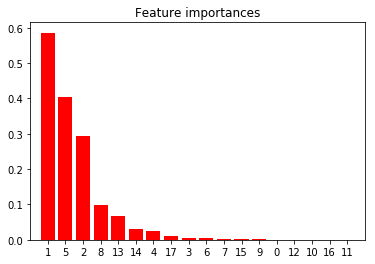

In [55]:
weights = clf.coef_[0]
importances = np.abs(weights)

indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

'budget','revenue','popularity','runtime','castRevBudRatio','january','february','march','april','may','june','july','august','september','october','november','december'

In [90]:
print(weights)
print(sorted(weights))
print(np.argsort(weights)[::-1])


[-4.76118759e-04  5.85817063e-01 -2.92899305e-01  5.06989970e-03
  2.39255086e-02 -4.05000273e-01  4.36186919e-03 -3.22808502e-03
 -9.84808272e-02  1.37782121e-03 -3.87981121e-05 -3.89691931e-09
  1.46013160e-04  6.63694356e-02  3.03907722e-02  1.57718160e-03
  5.99701204e-07 -1.06970287e-02]
[-0.4050002727975716, -0.2928993049091524, -0.09848082716733109, -0.010697028723136139, -0.0032280850246195537, -0.0004761187587964423, -3.8798112125312944e-05, -3.896919309001386e-09, 5.997012043986027e-07, 0.0001460131600899841, 0.0013778212127576522, 0.001577181597709688, 0.004361869194873644, 0.005069899698070823, 0.023925508597027786, 0.030390772236270274, 0.06636943557072605, 0.5858170626536032]
[ 1 13 14  4  3  6 15  9 12 16 11 10  0  7 17  8  2  5]


positive correlation: 1  Positive correlation below 0.0 coef: 13 14  4  3  6 15  9 12 16

Neg correlation: 5,2  Neg correlation below 0.0 coef: 11 10  0  7 17  8